In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import argparse
import gc
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
train_dir = train_dir = '../input/new_data/train_set.csv'
test_dir = '../input/new_data/test_set.csv'
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [2]:
train

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12
5,5,7368 1160791 299237 1238054 569999 1044285 117...,816903 669476 21577 520477 1004165 4184 616471...,13
6,6,893673 7368 836872 674898 231468 856005 105964...,277781 816903 1098157 986174 1033823 780491 10...,1
7,7,1122654 125310 907560 1172361 979583 983951 12...,289186 640942 363388 585102 261174 1217680 520...,10
8,8,793790 599682 1223643 1030656 569999 178976 45...,1257015 966562 1054308 599826 811205 520477 28...,10
9,9,7368 1120647 360394 79747 1140778 472252 7368 ...,816903 266069 1226448 1276450 816903 769051 12...,19


In [3]:
test

,id,article,word_seg
0,0,7368 146447 316564 42610 55736 297797 93042 53...,816903 565958 726082 764656 335008 75094 20282...
1,1,985531 473628 1044285 1121849 206763 462208 11...,729468 520477 529032 101368 335130 520477 1113...
2,2,7368 7368 7368 7368 7368 7368 7368 7368 7368 7...,816903 816903 816903 816903 816903 816903 8169...
3,3,529819 1226459 856005 1177293 663773 272235 93...,231664 1033823 524850 330478 507199 520477 618...
4,4,42610 1252069 1077049 955883 1125260 1044285 2...,545370 379223 162767 520477 1194630 1197475 11...
5,5,821297 1220011 1037539 828585 530023 593192 12...,922653 160975 400027 552368 520477 1142192 770...
6,6,7368 925120 835198 755561 641588 498390 744866...,816903 467168 507321 872938 816903 398011 6763...
7,7,999256 523980 1115452 163882 1086971 914012 34...,1206581 800780 371356 520477 176933 960350 756...
8,8,755561 345037 79747 390051 389346 744866 75959...,769051 1226448 845405 284146 816903 426716 920...
9,9,793630 593192 7368 7368 55748 555819 616873 18...,203284 816903 816903 582851 1258141 1158893 32...


In [4]:
all_data = pd.concat([train, test])
all_data = all_data.reset_index(drop=True)
train_offset = train.shape[0]

In [5]:
word_seg_list = all_data['word_seg']
word_seg_list = word_seg_list.apply(lambda x: x.split(" "))

In [6]:

word_counts = Counter()
for line in word_seg_list:
    word_counts.update(line)

In [7]:
counter_list = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

label = list(map(lambda x: x[0], counter_list[:60]))
# value = list(map(lambda y: y[1], counter_list[60:80]))

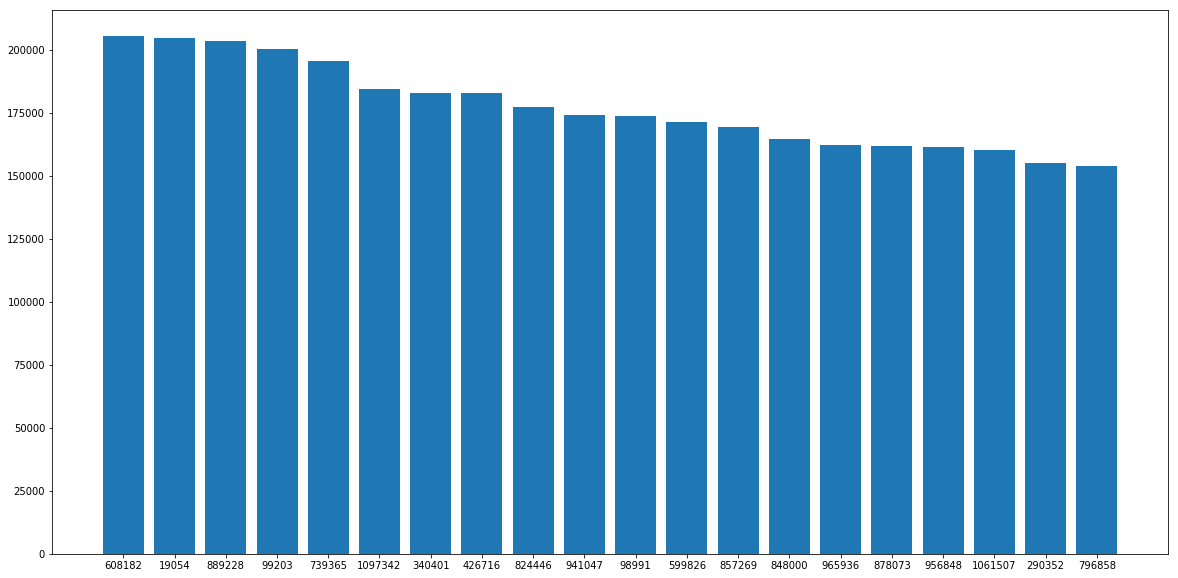

In [20]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(value)), value, tick_label=label)
plt.show()

In [8]:
from tqdm import tqdm
for i in tqdm(label):
    for j in word_seg_list:
        if i in j:
            j.remove(i)
all_data['word_seg'] = word_seg_list
all_data['word_seg'] = all_data['word_seg'].apply(lambda x: ' '.join(x))

100%|██████████| 60/60 [01:51<00:00,  1.85s/it]


In [5]:
def clear_text(df, num, col):
    word_seg = df[col]
    word_seg_list = word_seg.apply(lambda x: x.split(" "))

    word_counts = Counter()
    for line in word_seg_list:
        word_counts.update(line)

    counter_list = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    label = list(map(lambda x: x[0], counter_list[:num]))
    from tqdm import tqdm
    for i in tqdm(label):
        for j in word_seg_list:
            if i in j:
                j.remove(i)
    df[col] = word_seg_list
    df[col] = df[col].apply(lambda x: ' '.join(x))


In [ ]:
clear_text(all_data, 60, 'word_seg')

In [9]:
all_data

,article,class,id,word_seg
0,7368 1252069 365865 755561 1044285 129532 1053...,14.0,0,597526 1179558 758724 632718 520477 414956 625...
1,581131 165432 7368 957317 1197553 570900 33659...,3.0,1,90540 441039 816903 569138 816903 1034376 9974...
2,7368 87936 40494 490286 856005 641588 145611 1...,12.0,2,1012629 957974 328210 947200 652252 928251 347...
3,299237 760651 299237 887082 159592 556634 7489...,13.0,3,563568 1239563 680125 780219 782805 194441 251...
4,7368 7368 7368 865510 7368 396966 995243 37685...,12.0,4,816903 816903 139132 816903 312320 1103123 768...
5,7368 1160791 299237 1238054 569999 1044285 117...,13.0,5,669476 21577 1004165 4184 616471 520477 585102...
6,893673 7368 836872 674898 231468 856005 105964...,1.0,6,277781 1098157 986174 780491 1043709 901196 10...
7,1122654 125310 907560 1172361 979583 983951 12...,10.0,7,289186 640942 363388 585102 261174 1217680 386...
8,793790 599682 1223643 1030656 569999 178976 45...,10.0,8,1257015 1054308 599826 811205 289186 820884 10...
9,7368 1120647 360394 79747 1140778 472252 7368 ...,19.0,9,266069 1276450 816903 769051 1226448 965743 42...


In [10]:
train = all_data.iloc[:train_offset,:]
test = all_data.iloc[train_offset:,:]

In [12]:
train.to_csv('../input/new_data/train_remove60.csv', index=False)
test.to_csv('../input/new_data/test_remove60.csv', index=False)

In [10]:
f1s = [0.60, 0.77, 0.88, 0.85, 0.80, 0.92, 0.68, 0.73, 0.93, 0.70, 0.70, 0.68, 0.76, 0.79, 0.91, 0.72, 0.74, 0.87, 0.61]

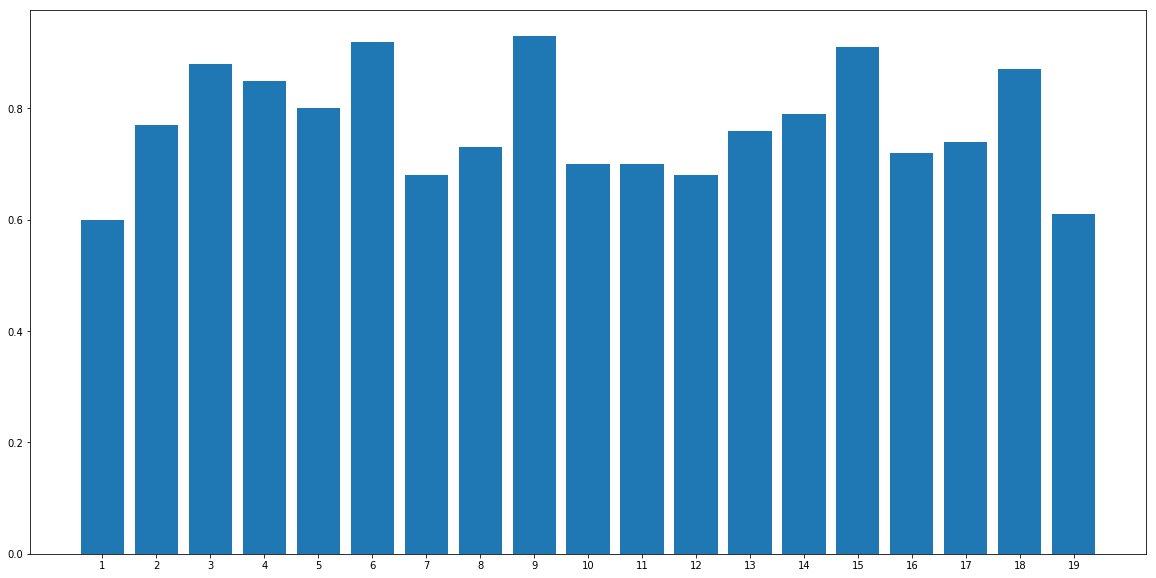

In [11]:

plt.figure(figsize=(20, 10))
plt.bar(train.groupby('class')['word_seg'].count().index, f1s, tick_label= train.groupby('class')['word_seg'].count().index)
plt.show()

In [9]:
result4 = pd.read_csv('../pro/prob_lgb_baseline3.csv')

In [37]:
result4.class_prob_19.describe()

count    102277.000000
mean          0.047235
std           0.143133
min           0.000011
25%           0.001639
50%           0.004749
75%           0.017329
max           0.999284
Name: class_prob_19, dtype: float64

In [28]:
result4

,class_prob_1,class_prob_2,class_prob_3,class_prob_4,class_prob_5,class_prob_6,class_prob_7,class_prob_8,class_prob_9,class_prob_10,class_prob_11,class_prob_12,class_prob_13,class_prob_14,class_prob_15,class_prob_16,class_prob_17,class_prob_18,class_prob_19,id
0,0.012505,0.000716,0.000225,0.000209,0.995462,0.000115,0.000031,0.002735,0.001548,0.000037,0.002147,0.000690,0.000611,0.004916,0.000308,0.000020,0.000558,1.185695e-03,0.021559,0
1,0.004007,0.000389,0.000540,0.978250,0.000692,0.000499,0.000151,0.000892,0.000154,0.000391,0.001293,0.003431,0.000440,0.000033,0.000055,0.000011,0.000055,4.526325e-04,0.000873,1
2,0.022319,0.003359,0.065725,0.000719,0.019038,0.000265,0.000246,0.110870,0.003070,0.003546,0.049309,0.023171,0.474635,0.001566,0.003266,0.000015,0.004283,4.134038e-03,0.043557,2
3,0.000650,0.000108,0.000310,0.999747,0.000442,0.000180,0.000009,0.001332,0.000357,0.000184,0.000594,0.000107,0.000171,0.000058,0.000027,0.000003,0.000255,9.247097e-06,0.000240,3
4,0.041052,0.000248,0.000153,0.000074,0.898192,0.000020,0.000040,0.009623,0.003477,0.000252,0.016117,0.002451,0.002523,0.013714,0.000523,0.000003,0.001143,7.435422e-05,0.001049,4
5,0.109547,0.002671,0.000184,0.001201,0.616108,0.000050,0.000090,0.075837,0.001078,0.003124,0.002751,0.000701,0.003792,0.000901,0.002365,0.000042,0.000444,1.092821e-03,0.006663,5
6,0.001548,0.000598,0.002518,0.000264,0.000297,0.000037,0.000170,0.001329,0.000446,0.000592,0.000241,0.000684,0.000272,0.001451,0.961824,0.000065,0.001271,2.629902e-04,0.044527,6
7,0.020301,0.018162,0.000387,0.000760,0.000736,0.000796,0.005918,0.005188,0.002959,0.006720,0.005935,0.006194,0.004623,0.000098,0.000994,0.000023,0.044784,2.345093e-03,0.322126,7
8,0.001765,0.000914,0.991716,0.000312,0.000649,0.003584,0.000061,0.000247,0.001370,0.000035,0.012807,0.002117,0.001460,0.000323,0.000420,0.000002,0.002542,1.099466e-04,0.004676,8
9,0.065359,0.001141,0.000046,0.000182,0.000767,0.000089,0.000191,0.011926,0.001642,0.062359,0.004041,0.529214,0.000782,0.000094,0.000023,0.000018,0.000478,8.734101e-04,0.014374,9


In [16]:
train2 = pd.read_csv('../input/new_data/train_remove60.csv')

In [26]:
train2.loc[train['class'] == 1]['word_seg'].values[0]

'277781 1098157 986174 780491 1043709 901196 1033823 481925 816903 1047796 812370 1238109 1033823 511940 816903 132082 816903 816903 1257015 654946 599826 165674 965936 25959 196494 302854 794485 825039 126797 1028506 300557 183528 41977 662489 1253164 520477 355387 662489 12135 756099 429547 263278 816903 816903 816903 1253164 1129290 716701 520477 526989 520477 909904 493181 425406 592860 520477 331143 686860 1257015 966562 814750 599826 1084125 995362 816903 816903 716701 816903 702481 345706 25959 481925 520477 197353 90061 520477 622292 419842 858727 352708 150789 197353 651513 1033823 995362 816903 816903 1022460 520477 716701 703648 580221 982084 54111 716955 520477 1190676 663987 150836 88758 995362 340401 966562 271975 599826 811205 520477 236244 1033823 580221 803183 995362 816903 816903 816903 700276 38841 520477 716701 343626 334947 714711 995362 716701 335130 1167667 844647 38841 244780 519665 918421 520477 1270224 910697 918421 520477 1253228 469755 244780 393580 1078721 

In [27]:
train.loc[train['class'] == 1]['word_seg'].values[0]

'277781 816903 1098157 986174 1033823 780491 1043709 901196 1033823 481925 816903 1047796 460600 812370 1238109 1033823 511940 816903 132082 816903 816903 1257015 966562 654946 599826 165674 965936 25959 196494 302854 520477 794485 825039 126797 1028506 300557 183528 41977 662489 1253164 520477 355387 662489 12135 756099 429547 263278 995362 816903 816903 816903 1253164 1129290 716701 520477 526989 477703 520477 909904 54111 493181 425406 592860 520477 331143 686860 1257015 966562 814750 599826 1084125 995362 816903 816903 716701 816903 702481 345706 25959 481925 520477 197353 834740 90061 520477 622292 419842 701424 858727 352708 150789 197353 651513 1033823 995362 816903 816903 1022460 520477 716701 703648 580221 982084 54111 716955 520477 1190676 663987 150836 88758 995362 340401 966562 271975 599826 811205 520477 236244 792049 1033823 580221 803183 995362 816903 816903 816903 700276 38841 520477 716701 343626 334947 714711 995362 716701 335130 1167667 844647 38841 244780 519665 918